<a href="https://colab.research.google.com/github/DaiVo20/za_traffic_detection/blob/main/keras_retinanet/data_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import cv2
import seaborn as sns

# **Train set**

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/TrafficSign/data/za_traffic_2020/traffic_train/train_filter.csv')
df_train

,file_name,xmin,ymin,xmax,ymax,class,label
0,drive/MyDrive/TrafficSign/data/za_traffic_2020...,880,333,899,351,No parking / waiting,2
1,drive/MyDrive/TrafficSign/data/za_traffic_2020...,768,480,777,487,No parking / waiting,2
2,drive/MyDrive/TrafficSign/data/za_traffic_2020...,1069,355,1152,438,No turning,3
3,drive/MyDrive/TrafficSign/data/za_traffic_2020...,781,337,798,352,Warning,6
4,drive/MyDrive/TrafficSign/data/za_traffic_2020...,733,352,740,360,No parking / waiting,2
...,...,...,...,...,...,...,...
9071,drive/MyDrive/TrafficSign/data/za_traffic_2020...,902,290,1175,390,Mandatory,7
9072,drive/MyDrive/TrafficSign/data/za_traffic_2020...,1338,173,1386,214,No parking / waiting,2
9073,drive/MyDrive/TrafficSign/data/za_traffic_2020...,969,335,984,351,Max Speed,4
9074,drive/MyDrive/TrafficSign/data/za_traffic_2020...,800,281,821,297,Warning,6


In [ ]:
len(df_train['file_name'].unique())

4500

In [ ]:
vi_class_idx = {
    1: "Cấm ngược chiều",
    2: "Cấm dừng và đỗ",
    3: "Cấm rẽ",
    4: "Giới hạn tốc độ",
    5: "Cấm còn lại",
    6: "Nguy hiểm",
    7: "Hiệu lệnh",
}

df_train['vi_class'] = df_train['label'].replace(vi_class_idx)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

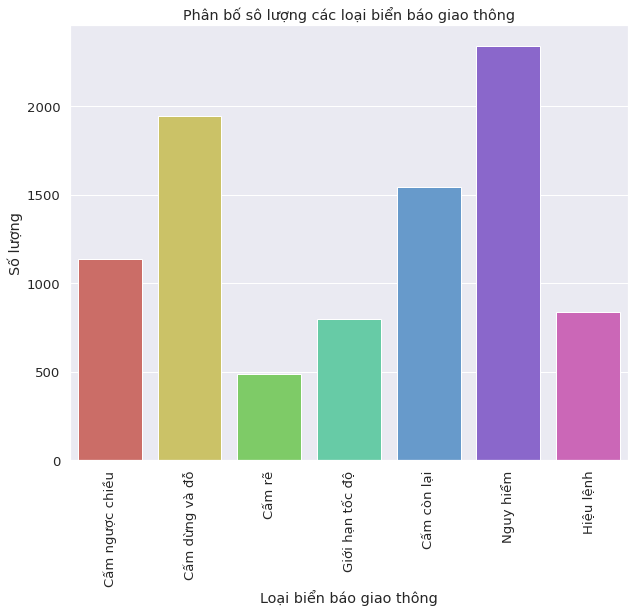

In [ ]:
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))
df_train_sorted = df_train.sort_values(by=['label'])
ax = sns.countplot(x='vi_class', data=df_train_sorted, palette='hls')
ax.set(xlabel='Loại biển báo giao thông', ylabel='Số lượng')
ax.set_title('Phân bố sô lượng các loại biển báo giao thông')
plt.xticks(rotation=90)

In [ ]:
img_size = (1622, 626)
df_train['width'] = (df_train['xmax'] - df_train['xmin'])/img_size[0]
df_train['height'] = (df_train['ymax'] - df_train['ymin'])/img_size[1]

Text(0.5, 1.0, 'Tỷ lện kích thước của của bounding box so với hình ảnh')

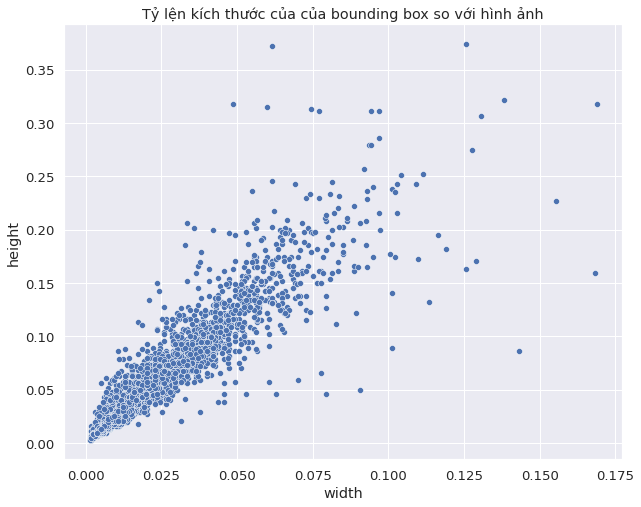

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(data=df_train, x="width", y="height")
ax.set_title("Tỷ lện kích thước của của bounding box so với hình ảnh")

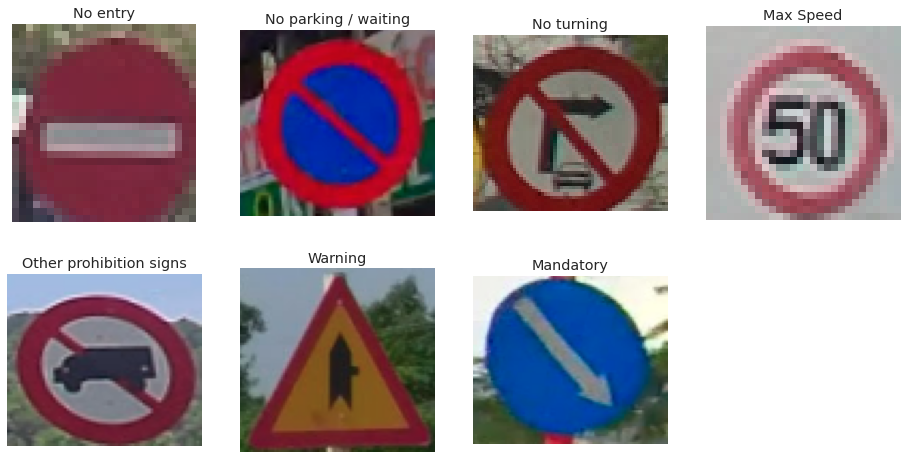

In [ ]:
nrows = 2
ncols = 4
position = 0

class_name = ['No entry', 'No parking / waiting', 'No turning', 'Max Speed', 'Other prohibition signs', 'Warning', 'Mandatory']

for idx, class_ in enumerate(class_name):
    dict_bbx = {0:3, 1:3, 2:3, 3:9, 4:12, 5:6, 6:1}
    df_sub = df_train[df_train['class'] == class_].iloc[dict_bbx[idx]]

    cur_image = mpimg.imread(df_sub['file_name'])
    bbox = [df_sub['xmin'], df_sub['ymin'], df_sub['xmax'], df_sub['ymax']]
    img_bbox = cur_image[bbox[1]:bbox[3], bbox[0]:bbox[2]]

    fig = plt.gcf()
    fig.set_size_inches(ncols * 4, nrows * 4)
    position += 1
    sp = plt.subplot(nrows, ncols, position)
    plt.imshow(img_bbox)
    plt.title(class_)
    plt.axis('Off')

# **Test set**

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/TrafficSign/data/za_traffic_2020/traffic_public_test/test.csv')
df_test

,file_name,xmin,ymin,xmax,ymax,class,label
0,drive/MyDrive/TrafficSign/data/za_traffic_2020...,1133,284,1199,342,No parking / waiting,2
1,drive/MyDrive/TrafficSign/data/za_traffic_2020...,864,322,877,333,Max Speed,4
2,drive/MyDrive/TrafficSign/data/za_traffic_2020...,1060,307,1110,348,No parking / waiting,2
3,drive/MyDrive/TrafficSign/data/za_traffic_2020...,805,294,829,318,No parking / waiting,2
4,drive/MyDrive/TrafficSign/data/za_traffic_2020...,732,290,745,302,No entry,1
...,...,...,...,...,...,...,...
1203,drive/MyDrive/TrafficSign/data/za_traffic_2020...,953,310,980,334,No parking / waiting,2
1204,drive/MyDrive/TrafficSign/data/za_traffic_2020...,462,264,481,283,Warning,6
1205,drive/MyDrive/TrafficSign/data/za_traffic_2020...,595,257,617,275,Other prohibition signs,5
1206,drive/MyDrive/TrafficSign/data/za_traffic_2020...,869,262,895,285,Max Speed,4


In [ ]:
len(df_test['file_name'].unique())

568

In [ ]:
df_test['vi_class'] = df_test['label'].replace(vi_class_idx)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

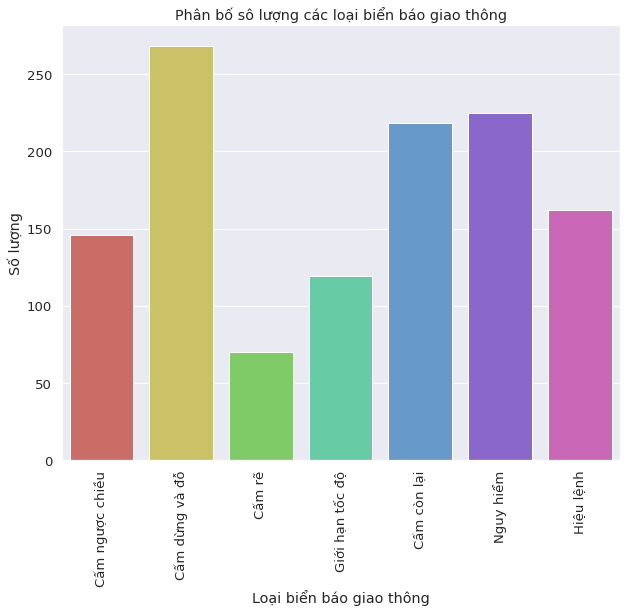

In [ ]:
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))
df_test_sorted = df_test.sort_values(by=['label'])
ax = sns.countplot(x='vi_class', data=df_test_sorted, palette='hls')
ax.set(xlabel='Loại biển báo giao thông', ylabel='Số lượng')
ax.set_title('Phân bố sô lượng các loại biển báo giao thông')
plt.xticks(rotation=90)

# **Train set croped**

In [ ]:
df_train_croped = pd.read_csv('/content/drive/MyDrive/TrafficSign/Model/RetinaNet/data_crop/image_crop/traffic_train/train_croped.csv')
df_train_croped

,file_name,xmin,ymin,xmax,ymax,width,height,label,image_split
0,/content/drive/MyDrive/TrafficSign/Model/Retin...,70,19,89,37,19,18,2,4
1,/content/drive/MyDrive/TrafficSign/Model/Retin...,259,41,342,124,83,83,3,4
2,/content/drive/MyDrive/TrafficSign/Model/Retin...,376,23,393,38,17,15,6,4
3,/content/drive/MyDrive/TrafficSign/Model/Retin...,214,2,289,74,75,72,2,4
4,/content/drive/MyDrive/TrafficSign/Model/Retin...,290,0,328,22,38,22,5,4
...,...,...,...,...,...,...,...,...,...
5565,/content/drive/MyDrive/TrafficSign/Model/Retin...,147,69,194,116,47,47,7,4
5566,/content/drive/MyDrive/TrafficSign/Model/Retin...,297,118,317,137,20,19,3,4
5567,/content/drive/MyDrive/TrafficSign/Model/Retin...,92,0,365,76,273,76,7,4
5568,/content/drive/MyDrive/TrafficSign/Model/Retin...,123,15,171,56,48,41,2,4


In [ ]:
img_size = (405, 156)
df_train_croped['width'] = (df_train_croped['xmax'] - df_train_croped['xmin'])/img_size[0]
df_train_croped['height'] = (df_train_croped['ymax'] - df_train_croped['ymin'])/img_size[1]

Text(0.5, 1.0, 'Tỷ lệ kích thước của của bounding box so với hình ảnh')

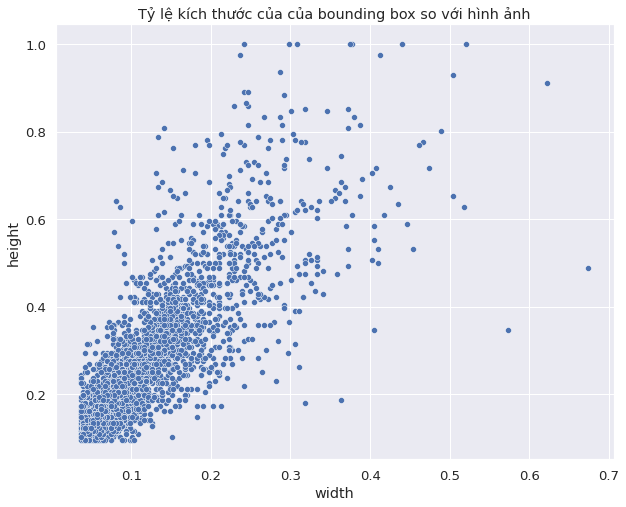

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(data=df_train_croped, x="width", y="height")
ax.set_title("Tỷ lệ kích thước của của bounding box so với hình ảnh")